# Data Retrieval

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pprint import pprint
import json
import plotly.express as px
import plotly.figure_factory as pff
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re, os

In [2]:
CONSUMER_KEY = "N1Jn8dOjUQUXJOkZYfwNNAoLa"
CONSUMER_KEY_SECRET = "1Lx4oYlILjSmMJXBInlblfVE4Qcahh9Y2gG7ZSwRZRk1WryqVt"
ACCESS_TOKEN = "1253693772879196161-jZK7M9EV1sizNcc9AEovL6M0U3gZC8"
ACCESS_TOKEN_SECRET = "NlW42A9Hx3aXPvrJq16wvEysmmN0ccnW7fPfqtsEpb3PO"
PATH_OUT = '../../out/task-2/'

In [3]:
auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_KEY_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
places = api.trends_available()


In [5]:
pprint(places)
DELHI_PLACE_ID = 20070458

[{'country': '',
  'countryCode': None,
  'name': 'Worldwide',
  'parentid': 0,
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'woeid': 1},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Winnipeg',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'woeid': 2972},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Ottawa',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'woeid': 3369},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Quebec',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'woeid': 3444},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Montreal',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',

In [6]:
trends = api.trends_place(id=DELHI_PLACE_ID)[0]


In [7]:
pprint(trends)
for trend in trends['trends']:
    print(trend['name'], trend['tweet_volume'])


{'as_of': '2020-12-19T13:02:08Z',
 'created_at': '2020-12-18T20:55:52Z',
 'locations': [{'name': 'Delhi', 'woeid': 20070458}],
 'trends': [{'name': '#ProudToBePrabhasFan',
             'promoted_content': None,
             'query': '%23ProudToBePrabhasFan',
             'tweet_volume': 26406,
             'url': 'http://twitter.com/search?q=%23ProudToBePrabhasFan'},
            {'name': '#CollegePremierLeagueFinale',
             'promoted_content': None,
             'query': '%23CollegePremierLeagueFinale',
             'tweet_volume': None,
             'url': 'http://twitter.com/search?q=%23CollegePremierLeagueFinale'},
            {'name': 'ROAR LIKE RUBINA',
             'promoted_content': None,
             'query': '%22ROAR+LIKE+RUBINA%22',
             'tweet_volume': 1088631,
             'url': 'http://twitter.com/search?q=%22ROAR+LIKE+RUBINA%22'},
            {'name': '#AmitShahInBengal',
             'promoted_content': None,
             'query': '%23AmitShahInBengal',


In [8]:
with open(os.path.join(PATH_OUT, 'trends.json'), 'w') as f:
    json.dump(trends, f)

In [9]:
TRENDING_HASHTAG = '#FarmersDoneWithModiJumlas'

In [24]:
def loop_twitter(cursor, limit):
    res = []
    for obj in tqdm(cursor.items(limit)):
        # tweepy automatically stalls on rate limit
        res.append(obj)
    return(res)

def full_display(df):
    pd.set_option('display.max_rows', 50)
    pd.set_option('display.max_columns', 10)
    pd.set_option('display.width', 150)
    pd.set_option('display.max_colwidth', -1)
    display(df)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')

In [11]:
query = f'{TRENDING_HASHTAG} -filter:retweets'
limit = 10000
cursor = tweepy.Cursor(api.search, q=query)
main_tweets = loop_twitter(cursor, limit)

5891it [05:52, 17.42it/s]Rate limit reached. Sleeping for: 547
10000it [19:15,  8.66it/s]


In [14]:
main_tweets_json = [t._json for t in main_tweets]

In [15]:
with open(os.path.join(PATH_OUT, 'main_tweets_utf.json'), 'w', encoding='utf-8') as f:
    json.dump(main_tweets_json, f, ensure_ascii=False)

In [16]:
with open(os.path.join(PATH_OUT, 'main_tweets_ascii.json'), 'w') as f:
    json.dump(main_tweets_json, f)

**Data after this could be retrieved from the json instead. Do not use the `tweepy.model.Status` object**

# Analysis

In [21]:
pprint(t._json)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Dec 19 13:03:10 +0000 2020',
 'entities': {'hashtags': [{'indices': [67, 93],
                            'text': 'FarmersDoneWithModiJumlas'}],
              'symbols': [],
              'urls': [],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1340281519089229825,
 'id_str': '1340281519089229825',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'hi',
 'metadata': {'iso_language_code': 'hi', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" '
           'rel="nofollow">Twitter for Android</a>',
 'text': 'मोदी से अच्छे दिनों की उम्मीद,\n'
         'जैसे मसाले के पैकेट मे गदहे की लीद।\n'
         '#FarmersDoneWithModiJumlas',
 '

In [3]:
with open(os.path.join(PATH_OUT, 'main_tweets_utf.json'), 'r', encoding='utf-8') as f:
    main_tweets_json = json.load(f)
df = pd.DataFrame.from_records(main_tweets_json)
display(df)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Sat Dec 19 13:03:10 +0000 2020,1340281519089229825,1340281519089229825,"मोदी से अच्छे दिनों की उम्मीद,\nजैसे मसाले के ...",False,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'hi', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,0,False,False,hi,NaN,NaN,NaN,NaN,NaN
1,Sat Dec 19 13:03:08 +0000 2020,1340281512005124098,1340281512005124098,#FarmersDoneWithModiJumlas\nmodi knjraaa mnn j...,False,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,0,False,False,in,"{'media': [{'id': 1340281390995222528, 'id_str...",False,NaN,NaN,NaN
2,Sat Dec 19 13:02:58 +0000 2020,1340281471525896193,1340281471525896193,#FarmersDoneWithModiJumlas,False,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,0,False,False,und,NaN,NaN,NaN,NaN,NaN
3,Sat Dec 19 13:02:56 +0000 2020,1340281463179112448,1340281463179112448,😂😂\n#FarmersDoneWithModiJumlas https://t.co/j6...,False,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,0,False,False,und,NaN,False,1.340171e+18,1340171428801302529,{'created_at': 'Sat Dec 19 05:45:42 +0000 2020...
4,Sat Dec 19 13:02:56 +0000 2020,1340281462902247424,1340281462902247424,#FarmersDoneWithModiJumlas https://t.co/GCs9ZC...,False,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,0,False,False,und,"{'media': [{'id': 1340281453196668929, 'id_str...",False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Sat Dec 19 07:44:35 +0000 2020,1340201348957151232,1340201348957151232,I think main v count ho geya. Anyway no proble...,False,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,2,False,False,en,NaN,False,1.339987e+18,1339986764526600193,{'created_at': 'Fri Dec 18 17:31:55 +0000 2020...
9996,Sat Dec 19 07:44:35 +0000 2020,1340201346683658240,1340201346683658240,According to our PM: farmers can sell crops an...,True,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,58,52,False,False,en,NaN,False,NaN,NaN,NaN
9997,Sat Dec 19 07:44:34 +0000 2020,1340201343064092673,1340201343064092673,#FarmersDoneWithModiJumlas https://t.co/HEMGNz...,False,{'hashtags': [{'text': 'FarmersDoneWithModiJum...,"{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,1,False,False,und,NaN,False,1.339905e+18,1339904517576376320,{'created_at': 'Fri Dec 18 12:05:05 +0000 2020...
9998,Sat Dec 19 07:44:32 +0000 2020,1340201332448219136,1340201332448219136,"ਮੋਦੀ ਸੱਜਣਾ ਏ ਕੋਈ ਗੱਲ ਤੇ ਨੀ ਨਾ, ਆਵਦੇ ਬਿੱਲ ਦੇ ਈ ...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pa', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,0,2,False,False,pa,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 10000 non-null  object 
 1   id                         10000 non-null  int64  
 2   id_str                     10000 non-null  object 
 3   text                       10000 non-null  object 
 4   truncated                  10000 non-null  bool   
 5   entities                   10000 non-null  object 
 6   metadata                   10000 non-null  object 
 7   source                     10000 non-null  object 
 8   in_reply_to_status_id      1942 non-null   float64
 9   in_reply_to_status_id_str  1942 non-null   object 
 10  in_reply_to_user_id        2030 non-null   float64
 11  in_reply_to_user_id_str    2030 non-null   object 
 12  in_reply_to_screen_name    2030 non-null   object 
 13  user                       10000 non-null  obje

In [5]:
full_display(df[df.place.notnull()]['place'])

NameError: name 'full_display' is not defined

In [15]:
lang_counts = df.groupby('lang')['id'].count().to_frame().reset_index()
lang_counts.columns = ['lang', 'count']
lang_counts.sort_values(by='count', inplace=True, ascending=False)
fg = px.pie(lang_counts[:10], values='count', names='lang', title='Tweets by Language')
fg.write_image(os.path.join(PATH_OUT, 'plots/language-dist.svg'))
fg.show()

In [7]:
pprint(t._json)

NameError: name 't' is not defined

In [8]:
filtered_df = df[['id', 'retweet_count', 'favorite_count', 'user', 'created_at', 'text']]
filtered_df = filtered_df.assign(user_id=lambda x: x.user.apply(lambda y: y['id']),
                   user_followers_count=lambda x: x.user.apply(lambda y: y['followers_count']),
                   user_friends_count=lambda x: x.user.apply(lambda y: y['friends_count']),
                   user_favorites_count=lambda x: x.user.apply(lambda y: y['favourites_count']),
                   user_verified=lambda x: x.user.apply(lambda y: y['verified']),
                   user_listed_count=lambda x: x.user.apply(lambda y: y['listed_count']),
                   user_statuses_count=lambda x: x.user.apply(lambda y: y['statuses_count']),
                   user_created_at=lambda x: x.user.apply(lambda y: y['created_at']))
display(filtered_df)
filtered_df.info()

,id,retweet_count,favorite_count,user,created_at,text,user_id,user_followers_count,user_friends_count,user_favorites_count,user_verified,user_listed_count,user_statuses_count,user_created_at
0,1340281519089229825,0,0,"{'id': 861721644, 'id_str': '861721644', 'name...",Sat Dec 19 13:03:10 +0000 2020,"मोदी से अच्छे दिनों की उम्मीद,\nजैसे मसाले के ...",861721644,3,32,169,False,0,139,Thu Oct 04 17:11:36 +0000 2012
1,1340281512005124098,0,0,"{'id': 1301372762066386944, 'id_str': '1301372...",Sat Dec 19 13:03:08 +0000 2020,#FarmersDoneWithModiJumlas\nmodi knjraaa mnn j...,1301372762066386944,36,109,145,False,0,428,Thu Sep 03 04:13:55 +0000 2020
2,1340281471525896193,0,0,"{'id': 1300272835340972034, 'id_str': '1300272...",Sat Dec 19 13:02:58 +0000 2020,#FarmersDoneWithModiJumlas,1300272835340972034,19,20,122,False,0,2027,Mon Aug 31 03:23:05 +0000 2020
3,1340281463179112448,0,0,"{'id': 1333349805217652738, 'id_str': '1333349...",Sat Dec 19 13:02:56 +0000 2020,😂😂\n#FarmersDoneWithModiJumlas https://t.co/j6...,1333349805217652738,297,1789,1001,False,0,904,Mon Nov 30 09:59:09 +0000 2020
4,1340281462902247424,0,0,"{'id': 1333815234117607425, 'id_str': '1333815...",Sat Dec 19 13:02:56 +0000 2020,#FarmersDoneWithModiJumlas https://t.co/GCs9ZC...,1333815234117607425,16,21,154,False,0,332,Tue Dec 01 16:49:20 +0000 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1340201348957151232,0,2,"{'id': 1274428802345635841, 'id_str': '1274428...",Sat Dec 19 07:44:35 +0000 2020,I think main v count ho geya. Anyway no proble...,1274428802345635841,65,88,1021,False,0,898,Sat Jun 20 19:48:13 +0000 2020
9996,1340201346683658240,58,52,"{'id': 1277715589729931264, 'id_str': '1277715...",Sat Dec 19 07:44:35 +0000 2020,According to our PM: farmers can sell crops an...,1277715589729931264,6,184,86,False,0,321,Mon Jun 29 21:28:42 +0000 2020
9997,1340201343064092673,0,1,"{'id': 1325098789552721920, 'id_str': '1325098...",Sat Dec 19 07:44:34 +0000 2020,#FarmersDoneWithModiJumlas https://t.co/HEMGNz...,1325098789552721920,17,141,293,False,0,337,Sat Nov 07 15:32:46 +0000 2020
9998,1340201332448219136,0,2,"{'id': 1333293629415297024, 'id_str': '1333293...",Sat Dec 19 07:44:32 +0000 2020,"ਮੋਦੀ ਸੱਜਣਾ ਏ ਕੋਈ ਗੱਲ ਤੇ ਨੀ ਨਾ, ਆਵਦੇ ਬਿੱਲ ਦੇ ਈ ...",1333293629415297024,20,57,28,False,0,119,Mon Nov 30 06:15:58 +0000 2020


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10000 non-null  int64 
 1   retweet_count         10000 non-null  int64 
 2   favorite_count        10000 non-null  int64 
 3   user                  10000 non-null  object
 4   created_at            10000 non-null  object
 5   text                  10000 non-null  object
 6   user_id               10000 non-null  int64 
 7   user_followers_count  10000 non-null  int64 
 8   user_friends_count    10000 non-null  int64 
 9   user_favorites_count  10000 non-null  int64 
 10  user_verified         10000 non-null  bool  
 11  user_listed_count     10000 non-null  int64 
 12  user_statuses_count   10000 non-null  int64 
 13  user_created_at       10000 non-null  object
dtypes: bool(1), int64(9), object(4)
memory usage: 1.0+ MB


In [9]:
user_df = filtered_df[['user_id', 'user_followers_count', 'user_friends_count', 'user_favorites_count', 'user_listed_count', 'user_verified', 'user_statuses_count', 'user_created_at']].drop_duplicates(subset='user_id', ignore_index=True)
user_df.set_index(keys='user_id', inplace=True, verify_integrity=True)
user_df.info()
display(user_df)
user_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 861721644 to 1333550433692839936
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_followers_count  3286 non-null   int64 
 1   user_friends_count    3286 non-null   int64 
 2   user_favorites_count  3286 non-null   int64 
 3   user_listed_count     3286 non-null   int64 
 4   user_verified         3286 non-null   bool  
 5   user_statuses_count   3286 non-null   int64 
 6   user_created_at       3286 non-null   object
dtypes: bool(1), int64(5), object(1)
memory usage: 182.9+ KB


,user_followers_count,user_friends_count,user_favorites_count,user_listed_count,user_verified,user_statuses_count,user_created_at
user_id,,,,,,,
861721644,3,32,169,0,False,139,Thu Oct 04 17:11:36 +0000 2012
1301372762066386944,36,109,145,0,False,428,Thu Sep 03 04:13:55 +0000 2020
1300272835340972034,19,20,122,0,False,2027,Mon Aug 31 03:23:05 +0000 2020
1333349805217652738,297,1789,1001,0,False,904,Mon Nov 30 09:59:09 +0000 2020
1333815234117607425,16,21,154,0,False,332,Tue Dec 01 16:49:20 +0000 2020
...,...,...,...,...,...,...,...
1305132139856322560,2,41,234,0,False,38,Sun Sep 13 13:12:35 +0000 2020
1320607936683495424,282,453,242,0,False,108,Mon Oct 26 06:07:37 +0000 2020
1333971748379795457,4,11,4,0,False,3,Wed Dec 02 03:10:42 +0000 2020


,user_followers_count,user_friends_count,user_favorites_count,user_listed_count,user_statuses_count
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000
mean,569.179245,267.202678,3732.446744,0.854230,3111.604687
std,7404.878940,749.787978,15572.553891,7.036742,18362.773726
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,23.000000,58.000000,0.000000,50.000000
50%,20.000000,67.000000,309.000000,0.000000,199.000000
75%,95.750000,190.000000,1443.750000,0.000000,886.000000
max,377147.000000,9880.000000,357407.000000,185.000000,711998.000000


In [10]:
agg_df = filtered_df[['user_id', 'retweet_count', 'favorite_count']]
agg_df = agg_df.groupby('user_id').agg('mean')
agg_df.columns = ['avg_retweet_count', 'avg_favorite_count']
agg_df.info()
display(agg_df)
agg_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 1280121 to 1340276532300771328
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_retweet_count   3286 non-null   float64
 1   avg_favorite_count  3286 non-null   float64
dtypes: float64(2)
memory usage: 77.0 KB


,avg_retweet_count,avg_favorite_count
user_id,,
1280121,0.000000,0.000000
16651231,1.000000,5.000000
17217096,1.000000,0.000000
17426428,0.272727,0.545455
17673886,0.000000,0.000000
...,...,...
1340229436747120640,1.000000,1.000000
1340231124266565634,0.000000,1.000000
1340233724504453120,0.000000,2.000000


,avg_retweet_count,avg_favorite_count
count,3286.000000,3286.000000
mean,1.760133,3.091894
std,8.728370,17.775750
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.830882
max,187.000000,588.500000


In [11]:
user_df = user_df.join(agg_df, how='inner')
user_df.info()
display(user_df)
user_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 861721644 to 1333550433692839936
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_followers_count  3286 non-null   int64  
 1   user_friends_count    3286 non-null   int64  
 2   user_favorites_count  3286 non-null   int64  
 3   user_listed_count     3286 non-null   int64  
 4   user_verified         3286 non-null   bool   
 5   user_statuses_count   3286 non-null   int64  
 6   user_created_at       3286 non-null   object 
 7   avg_retweet_count     3286 non-null   float64
 8   avg_favorite_count    3286 non-null   float64
dtypes: bool(1), float64(2), int64(5), object(1)
memory usage: 234.3+ KB


,user_followers_count,user_friends_count,user_favorites_count,user_listed_count,user_verified,user_statuses_count,user_created_at,avg_retweet_count,avg_favorite_count
user_id,,,,,,,,,
861721644,3,32,169,0,False,139,Thu Oct 04 17:11:36 +0000 2012,0.000000,0.000000
1301372762066386944,36,109,145,0,False,428,Thu Sep 03 04:13:55 +0000 2020,0.000000,0.000000
1300272835340972034,19,20,122,0,False,2027,Mon Aug 31 03:23:05 +0000 2020,0.500000,0.000000
1333349805217652738,297,1789,1001,0,False,904,Mon Nov 30 09:59:09 +0000 2020,1.583333,2.958333
1333815234117607425,16,21,154,0,False,332,Tue Dec 01 16:49:20 +0000 2020,0.076923,0.000000
...,...,...,...,...,...,...,...,...,...
1305132139856322560,2,41,234,0,False,38,Sun Sep 13 13:12:35 +0000 2020,0.000000,1.000000
1320607936683495424,282,453,242,0,False,108,Mon Oct 26 06:07:37 +0000 2020,0.000000,1.000000
1333971748379795457,4,11,4,0,False,3,Wed Dec 02 03:10:42 +0000 2020,0.000000,1.000000


,user_followers_count,user_friends_count,user_favorites_count,user_listed_count,user_statuses_count,avg_retweet_count,avg_favorite_count
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000
mean,569.179245,267.202678,3732.446744,0.854230,3111.604687,1.760133,3.091894
std,7404.878940,749.787978,15572.553891,7.036742,18362.773726,8.728370,17.775750
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.000000,23.000000,58.000000,0.000000,50.000000,0.000000,0.000000
50%,20.000000,67.000000,309.000000,0.000000,199.000000,0.000000,1.000000
75%,95.750000,190.000000,1443.750000,0.000000,886.000000,1.000000,1.830882
max,377147.000000,9880.000000,357407.000000,185.000000,711998.000000,187.000000,588.500000


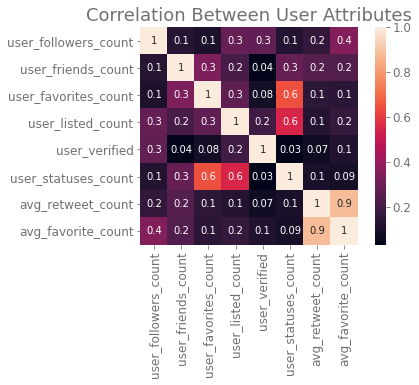

In [13]:
ax = sns.heatmap(user_df.corr(), annot=True, fmt='.1g', square=True)
ax.set_title('Correlation Between User Attributes')
fg = ax.get_figure()
fg.patch.set_facecolor('white')
fg.savefig(os.path.join(PATH_OUT, 'plots/user-corr.png'), dpi=200, bbox_inches='tight')
plt.show()

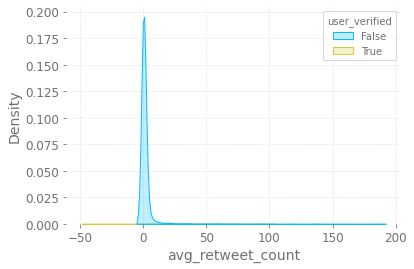

In [16]:
sns.kdeplot(data=user_df, x='avg_retweet_count', hue='user_verified', fill=True)
plt.show()

In [17]:
text_df = df[['text', 'lang', 'id', 'created_at']]
text_df['created_at'] = pd.to_datetime(text_df['created_at'])
text_df = text_df[text_df.lang == 'en']
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 6 to 9996
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   text        2612 non-null   object             
 1   lang        2612 non-null   object             
 2   id          2612 non-null   int64              
 3   created_at  2612 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 102.0+ KB


In [18]:
try:
    senti = SentimentIntensityAnalyzer()
except LookupError:
    nltk.download('vader_lexicon')
    senti = SentimentIntensityAnalyzer()

In [19]:
def filter_pattern(text, pattern):
    match = re.findall(pattern, text)
    for m in match:
        text = re.sub(m, ' ', text)
    return text

TWITTER_HANDLE_REGEX = '@\w{1,15}'
URL_REGEX = 'https?://[A-Za-z0-9./]*'

text_df['text'] = text_df['text'].apply(filter_pattern, args=(TWITTER_HANDLE_REGEX, ))
text_df['text'] = text_df['text'].apply(filter_pattern, args=(URL_REGEX, ))

In [20]:
def calc_sentiment(text, senti):
    res = senti.polarity_scores(text)
    return res['neg'], res['neu'], res['pos'], res['compound']

scores = text_df['text'].apply(calc_sentiment, args=(senti, )).apply(pd.Series)
scores.columns = ['negative', 'neutral', 'positive', 'compound']
text_df = text_df.join(scores, how='left') # on default index
text_df.info()
display(text_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 6 to 9996
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   text        2612 non-null   object             
 1   lang        2612 non-null   object             
 2   id          2612 non-null   int64              
 3   created_at  2612 non-null   datetime64[ns, UTC]
 4   negative    2612 non-null   float64            
 5   neutral     2612 non-null   float64            
 6   positive    2612 non-null   float64            
 7   compound    2612 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 263.7+ KB


,text,lang,id,created_at,negative,neutral,positive,compound
6,Support farmers\n#FarmersDoneWithModiJumlas,en,1340281434020319232,2020-12-19 13:02:49+00:00,0.000,0.426,0.574,0.4019
9,Kangna is totally jobless these days except fo...,en,1340281394187005959,2020-12-19 13:02:40+00:00,0.244,0.756,0.000,-0.6369
12,#FarmersProtest : #Farmers at #Ghazipurborder ...,en,1340281348695629825,2020-12-19 13:02:29+00:00,0.000,1.000,0.000,0.0000
18,Shame on #modishah \n#FarmersDoneWithModiJumlas,en,1340281311559208960,2020-12-19 13:02:20+00:00,0.508,0.492,0.000,-0.4767
25,BJP has ruined the country. Gave nothing else ...,en,1340281164402020352,2020-12-19 13:01:45+00:00,0.157,0.843,0.000,-0.2617
...,...,...,...,...,...,...,...,...
9981,Beauty of Kisan Morcha❤️❤️\nIt’s uniting peo...,en,1340201402283356160,2020-12-19 07:44:48+00:00,0.000,0.759,0.241,0.5859
9987,MP farmers got huge benefit. What about bi...,en,1340201376979300352,2020-12-19 07:44:42+00:00,0.000,0.654,0.346,0.6486
9988,Our PM showing condolence for the mother of Na...,en,1340201373485285378,2020-12-19 07:44:41+00:00,0.099,0.901,0.000,-0.3182
9995,I think main v count ho geya. Anyway no proble...,en,1340201348957151232,2020-12-19 07:44:35+00:00,0.412,0.588,0.000,-0.5994


In [21]:
def categorise_sentiment(val):
    # based on official paper: https://github.com/cjhutto/vaderSentiment#about-the-scoring
    if val >= 0.05:
        return 'Positive'
    elif val > -0.05:
        return 'Neutral'
    else:
        return 'Negative'

text_df['sentiment'] = text_df['compound'].apply(categorise_sentiment)
text_df.info()
display(text_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 6 to 9996
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   text        2612 non-null   object             
 1   lang        2612 non-null   object             
 2   id          2612 non-null   int64              
 3   created_at  2612 non-null   datetime64[ns, UTC]
 4   negative    2612 non-null   float64            
 5   neutral     2612 non-null   float64            
 6   positive    2612 non-null   float64            
 7   compound    2612 non-null   float64            
 8   sentiment   2612 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(3)
memory usage: 284.1+ KB


,text,lang,id,created_at,negative,neutral,positive,compound,sentiment
6,Support farmers\n#FarmersDoneWithModiJumlas,en,1340281434020319232,2020-12-19 13:02:49+00:00,0.000,0.426,0.574,0.4019,Positive
9,Kangna is totally jobless these days except fo...,en,1340281394187005959,2020-12-19 13:02:40+00:00,0.244,0.756,0.000,-0.6369,Negative
12,#FarmersProtest : #Farmers at #Ghazipurborder ...,en,1340281348695629825,2020-12-19 13:02:29+00:00,0.000,1.000,0.000,0.0000,Neutral
18,Shame on #modishah \n#FarmersDoneWithModiJumlas,en,1340281311559208960,2020-12-19 13:02:20+00:00,0.508,0.492,0.000,-0.4767,Negative
25,BJP has ruined the country. Gave nothing else ...,en,1340281164402020352,2020-12-19 13:01:45+00:00,0.157,0.843,0.000,-0.2617,Negative
...,...,...,...,...,...,...,...,...,...
9981,Beauty of Kisan Morcha❤️❤️\nIt’s uniting peo...,en,1340201402283356160,2020-12-19 07:44:48+00:00,0.000,0.759,0.241,0.5859,Positive
9987,MP farmers got huge benefit. What about bi...,en,1340201376979300352,2020-12-19 07:44:42+00:00,0.000,0.654,0.346,0.6486,Positive
9988,Our PM showing condolence for the mother of Na...,en,1340201373485285378,2020-12-19 07:44:41+00:00,0.099,0.901,0.000,-0.3182,Negative
9995,I think main v count ho geya. Anyway no proble...,en,1340201348957151232,2020-12-19 07:44:35+00:00,0.412,0.588,0.000,-0.5994,Negative


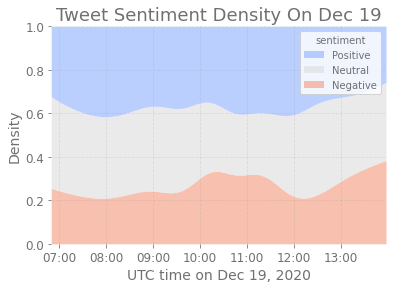

In [22]:
ax = sns.kdeplot(data=text_df, x='created_at', hue='sentiment', multiple='fill', linewidth=0, alpha=0.6, palette='coolwarm', hue_order=('Positive', 'Neutral', 'Negative'))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax.set_xlabel('UTC time on Dec 19, 2020')
ax.set_title('Tweet Sentiment Density On Dec 19')
fg = ax.get_figure()
fg.patch.set_facecolor('white')
fg.savefig(os.path.join(PATH_OUT, 'plots/sentiment-density.png'), dpi=200)
fg.show()

In [25]:
full_display(text_df[text_df.sentiment == 'Positive']['text'])

6       Support farmers\n#FarmersDoneWithModiJumlas                                                                             
58      So funny ..... Please stop this....😃#FarmersDoneWithModiJumlas                                                          
69      KEEP SUPPORTING FARMERS✊🌾\n#FarmersDoneWithModiJumlas                                                                   
76      If the agriculture bill is for the benefit of farmers, then why is Adani promoting it ??\n\n That too by giving crore…  
91      Stay strong, stay united\n#FarmersDoneWithModiJumlas                                                                    
                                 ...                                                                                            
9932    Thanks for Supporting Sir\n#FarmersDoneWithModiJumlas                                                                   
9933    Good one \n\n#FarmersDoneWithModiJumlas                                                  

In [252]:
def get_centroid(place):
    return np.array(place['bounding_box']['coordinates'][0], dtype=np.float64).mean(axis=0)

place_df = df[df.place.notnull()]['place']
centroid_df = place_df.apply(get_centroid).apply(pd.Series)
centroid_df.columns = ['latitude', 'longitude']
display(centroid_df)

In [ ]:
# fig = pff.create_hexbin_mapbox(data_frame=centroid_df, lat='latitude', lon='longitude', labels={'color': 'Tweet Count'})
# fig.update_layout(mapbox_style='open-street-map')
# fig.show()

In [256]:
display(centroid_df)

,latitude,longitude
16,150.931975,-33.848244
30,115.928319,-32.150100
80,75.892913,30.794095
85,77.095086,28.638489
86,74.931327,31.606560
...,...,...
9834,-79.272570,43.629311
9855,-79.759591,43.724971
9872,76.776524,30.730386
9929,75.414748,31.060139
